### Importing data 

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Xueho\\Projects\\Collaborative-Projects\\cleaned_ranking_2.csv')
print(df.shape)
df.head(3)

(273898, 16)


,Unnamed: 0,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
0,0,AL,Hale County,1.0,65.0,Premature Death,1.0,271.0,NaN,12228.624,10218.083,14239.165,2010.0,1065.0,2004.0,2006.0
1,1,AL,Hale County,1.0,65.0,Premature Death,1.0,278.0,NaN,11626.723,9767.516,13485.930,2011.0,1065.0,2005.0,2007.0
2,2,AL,Hale County,1.0,65.0,Premature Death,1.0,286.0,NaN,13522.955,11397.331,15648.579,2012.0,1065.0,2006.0,2008.0


In [3]:
df = df.rename(columns = {'Unnamed: 0':'index'})
df.isnull().sum().sort_values()

index                             0
state                             0
county                            0
state_code                        0
county_code                       0
measure_name                      0
measure_id                        0
raw_value                         0
fips_code                         0
start_year                        0
numerator                     77142
denominator                   96440
confidence_interval_lower    100473
confidence_interval_upper    100473
data_release_year            137092
end_year                     205729
dtype: int64

In [5]:
df = df[['state', 'county', 'state_code', 'county_code', 'measure_name', 'measure_id', 'numerator', 'denominator', 'raw_value',
        'fips_code', 'start_year', ]]

In [107]:
# Fred found out that county name are state names when county==0.

df[df.county_code==0]['county'].value_counts()

Illinois                90
Ohio                    90
Tennessee               90
California              90
Kansas                  90
Nevada                  90
Pennsylvania            90
Michigan                90
Maine                   90
New Hampshire           90
North Dakota            90
Rhode Island            90
Iowa                    90
Florida                 90
South Carolina          90
Wisconsin               90
Arkansas                90
Georgia                 90
Idaho                   90
Utah                    90
Mississippi             90
West Virginia           90
New Mexico              90
Oklahoma                90
Minnesota               90
Montana                 90
Arizona                 90
Oregon                  90
Massachusetts           90
Connecticut             90
Nebraska                90
Texas                   90
Alabama                 90
New Jersey              90
South Dakota            90
North Carolina          90
Indiana                 90
V

In [108]:
df = df[df.county_code!=0]

In [109]:
df.describe()

,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
count,269328.000000,269328.000000,269328.000000,1.935450e+05,1.744510e+05,269328.000000,269328.000000,269328.000000
mean,30.385459,103.468210,38.651217,3.928770e+03,4.364983e+04,1139.766557,30488.927575,2006.692694
std,15.146888,108.102091,37.463466,2.100739e+04,1.847151e+05,2926.455025,15165.404335,3.152749
min,1.000000,1.000000,1.000000,0.000000e+00,1.000000e+01,0.000000,1001.000000,1997.000000
25%,19.000000,35.000000,7.000000,2.000000e+02,1.995000e+03,0.220000,19005.000000,2005.000000
50%,29.000000,79.000000,24.000000,7.330000e+02,7.879000e+03,0.693000,29181.000000,2007.000000
75%,45.000000,133.000000,50.000000,2.348000e+03,2.566700e+04,106.700851,45085.000000,2009.000000
max,72.000000,840.000000,125.000000,2.248384e+06,1.000469e+07,32810.400000,72153.000000,2012.000000


In [110]:
df.isnull().sum().sort_values()

state               0
county              0
state_code          0
county_code         0
measure_name        0
measure_id          0
raw_value           0
fips_code           0
start_year          0
numerator       75783
denominator     94877
dtype: int64

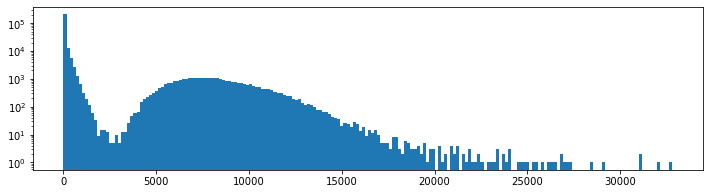

In [111]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df.raw_value, bins=200)
ax.set_yscale('log')

In [112]:
df.start_year.value_counts()

2008.0    37024
2009.0    34033
2010.0    31092
2006.0    29991
2007.0    24775
2004.0    21557
2005.0    21546
2011.0    21445
2003.0    21133
2002.0     9145
2012.0     3218
1997.0     2884
1998.0     2879
2001.0     2870
2000.0     2868
1999.0     2868
Name: start_year, dtype: int64

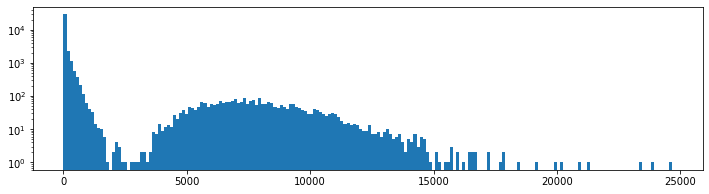

In [113]:
dfy = df[df.start_year == 2008]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

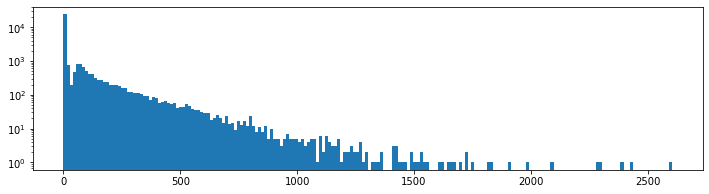

In [114]:
dfy = df[df.start_year == 2009]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

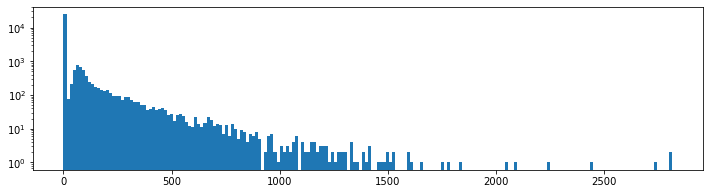

In [115]:
dfy = df[df.start_year == 2010]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

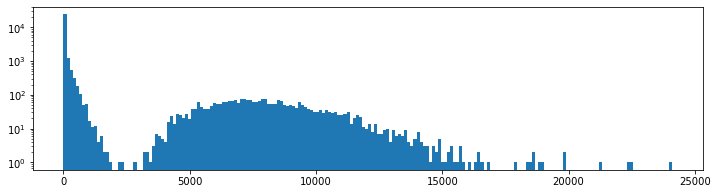

In [116]:
dfy = df[df.start_year == 2006]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

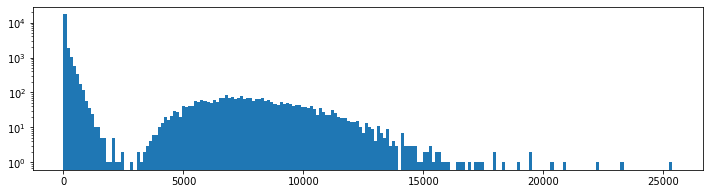

In [117]:
dfy = df[df.start_year == 2007]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

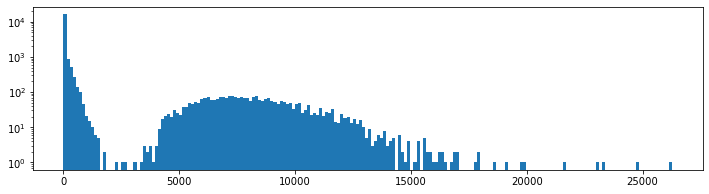

In [118]:
dfy = df[df.start_year == 2004]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

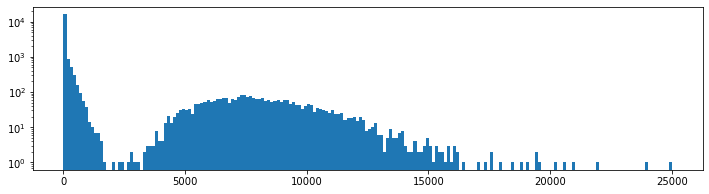

In [119]:
dfy = df[df.start_year == 2005]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

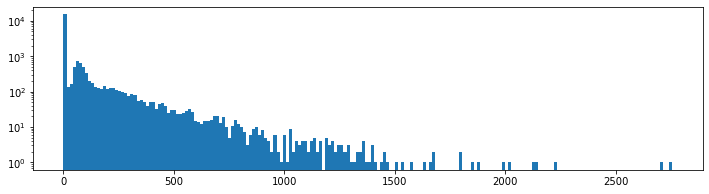

In [120]:
dfy = df[df.start_year == 2011]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

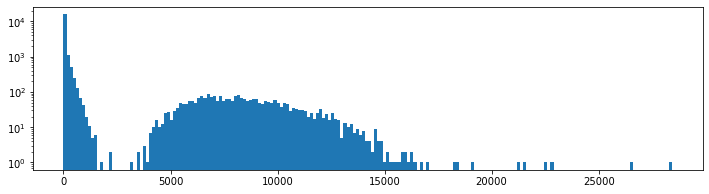

In [121]:
dfy = df[df.start_year == 2003]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

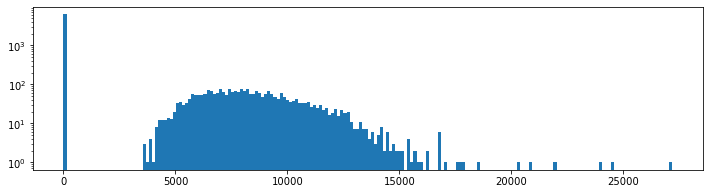

In [122]:
dfy = df[df.start_year == 2002]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

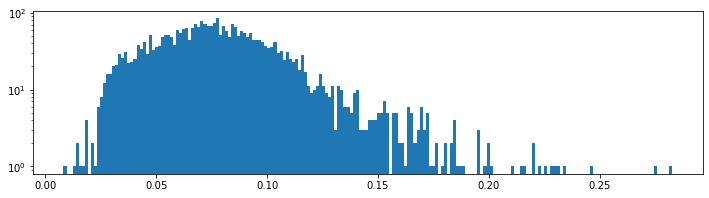

In [123]:
dfy = df[df.start_year == 2012]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

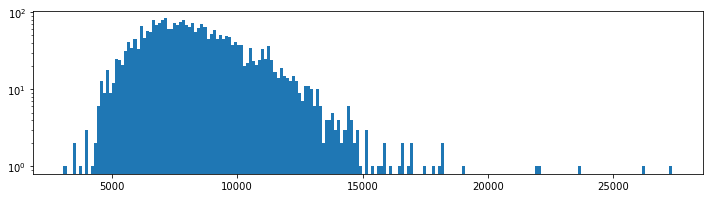

In [124]:
dfy = df[df.start_year == 1997]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

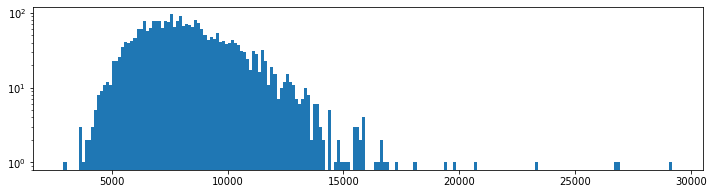

In [125]:
dfy = df[df.start_year == 1998]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

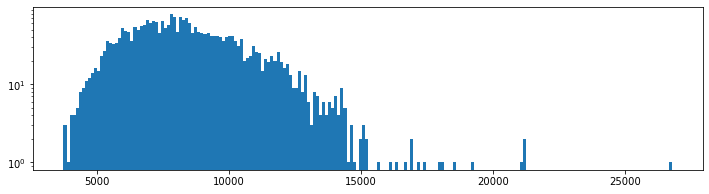

In [126]:
dfy = df[df.start_year == 2001]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

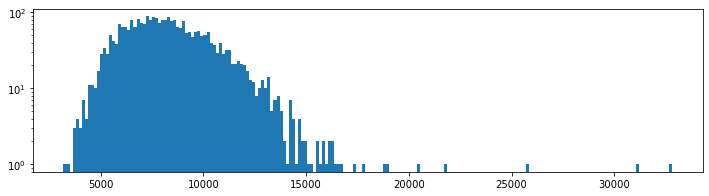

In [127]:
dfy = df[df.start_year == 2000]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

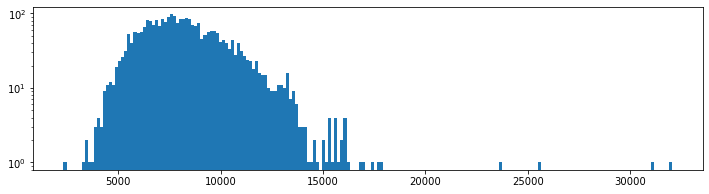

In [128]:
dfy = df[df.start_year == 1999]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

The raw value column has very complex distribution.  When grouped by start-year, three distinct patterns emerge.  1. declining seen 2009, 2010 and 2011, 2. double peaks seen in 2008, 2006, 2007, 2004, 2005, 2003 and 2002, 3. one peak seen in 1997, 1998, 2001, 2000 and 1999.  Although 2012 also has only one peak, the raw_values are very different from other years since they are all less than 1.  Therefore, data will be analyzed in four groups.  

### <b>Group by similar years

(86570, 11)

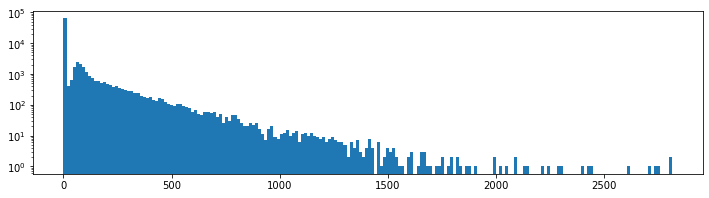

In [129]:
df1 = df[df['start_year'].isin([2009, 2010, 2011])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df1.raw_value, bins=200)
ax.set_yscale('log')
df1.shape

In [184]:
# Top five records with highest raw_values.

df1.sort_values('raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
152920,AK,Nome Census Area,2.0,180.0,Sexually transmitted infections,45.0,267.0,9492.0,2812.9,2180.0,2010.0
152958,AK,Wade Hampton Census Area,2.0,270.0,Sexually transmitted infections,45.0,209.0,7459.0,2802.0,2270.0,2010.0
152931,AK,Northwest Arctic Borough,2.0,188.0,Sexually transmitted infections,45.0,213.0,7733.0,2754.4,2188.0,2011.0
152930,AK,Northwest Arctic Borough,2.0,188.0,Sexually transmitted infections,45.0,206.0,7523.0,2738.3,2188.0,2010.0
152959,AK,Wade Hampton Census Area,2.0,270.0,Sexually transmitted infections,45.0,207.0,7662.0,2701.6,2270.0,2011.0


(165171, 11)

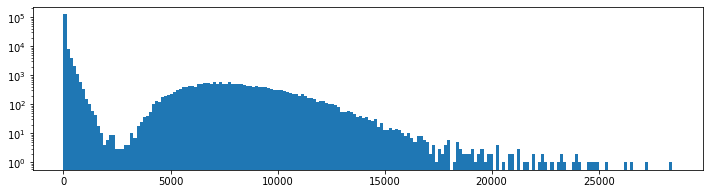

In [130]:
df2 = df[df['start_year'].isin([2008,2007,2006,2004,2005,2003,2002])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df2.raw_value, bins=200)
ax.set_yscale('log')
df2.shape

In [185]:
# Top five records with highest raw_values.

df2.sort_values('raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
27258,SD,Mellette County,46.0,95.0,Premature Death,1.0,54.0,NaN,28433.300,46095.0,2003.0
27334,SD,Shannon County,46.0,113.0,Premature Death,1.0,311.0,NaN,27178.700,46113.0,2002.0
27335,SD,Shannon County,46.0,113.0,Premature Death,1.0,311.0,NaN,26489.600,46113.0,2003.0
27336,SD,Shannon County,46.0,113.0,Premature Death,1.0,307.0,NaN,26281.428,46113.0,2004.0
22931,ND,Sioux County,38.0,85.0,Premature Death,1.0,105.0,NaN,25367.021,38085.0,2007.0


(14369, 11)

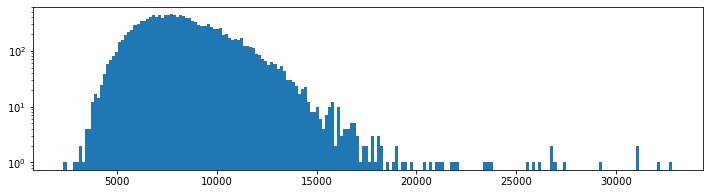

In [172]:
df3 = df[df['start_year'].isin([1997,1998,1999,2001,2000])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df3.raw_value, bins=200)
ax.set_yscale('log')
df3.shape

In [186]:
# Top five records with highest raw_values.

df3.sort_values('raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
535,AK,Lake and Peninsula Borough,2.0,164.0,Premature Death,1.0,48.0,NaN,32810.4,2164.0,2000.0
26941,SD,Buffalo County,46.0,17.0,Premature Death,1.0,54.0,NaN,32053.9,46017.0,1999.0
534,AK,Lake and Peninsula Borough,2.0,164.0,Premature Death,1.0,46.0,NaN,31086.4,2164.0,1999.0
26942,SD,Buffalo County,46.0,17.0,Premature Death,1.0,50.0,NaN,31049.2,46017.0,2000.0
26940,SD,Buffalo County,46.0,17.0,Premature Death,1.0,52.0,NaN,29193.4,46017.0,1998.0


(3218, 11)

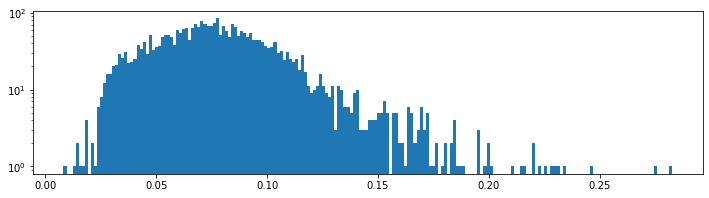

In [155]:
df4 = df[df['start_year']==2012]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df4.raw_value, bins=200)
ax.set_yscale('log')

df4.shape

In [187]:
# Top five records with highest raw_values in year 2012.

df4.sort_values('raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
37951,CA,Imperial County,6.0,25.0,Unemployment,23.0,22132.0,78282.0,0.282721,6025.0,2012.0
36961,AZ,Yuma County,4.0,27.0,Unemployment,23.0,25277.0,92015.0,0.274705,4027.0,2012.0
70809,PR,Salinas Municipio,72.0,123.0,Unemployment,23.0,2061.0,8367.0,0.246325,72123.0,2012.0
70801,PR,Orocovis Municipio,72.0,107.0,Unemployment,23.0,1198.0,5120.0,0.233984,72107.0,2012.0
70747,PR,Adjuntas Municipio,72.0,1.0,Unemployment,23.0,1034.0,4466.0,0.231527,72001.0,2012.0


### <b>Most frequent occurrence of the measures in different states in different groups

In [255]:
# Top five measures with the most occurrence in different states in group 1

df1_state = df1.groupby(['measure_name','state']).count().reset_index()
d1 = df1_state.sort_values('raw_value', ascending=False).head()
d1

,measure_name,state,county,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
94,Children in poverty,TX,762,762,762,762,762,0,762,762,762
142,Daily fine particulate matter,TX,762,762,762,762,0,0,762,762,762
448,Unemployment,TX,762,762,762,762,762,762,762,762,762
397,Sexually transmitted infections,TX,742,742,742,742,742,731,742,742,742
193,Diabetic screening,TX,741,741,741,741,0,741,741,741,741


In [258]:
print(df1[df1.measure_name==d1.iloc[0,0]].shape)
print(df1[df1.measure_name==d1.iloc[1,0]].shape)
print(df1[df1.measure_name==d1.iloc[2,0]].shape)
print(df1[df1.measure_name==d1.iloc[3,0]].shape)
print(df1[df1.measure_name==d1.iloc[4,0]].shape)

(9411, 11)
(9321, 11)
(9420, 11)
(9232, 11)
(9272, 11)


In [259]:
# Top five measures with the most occurrence in different states in group 2

df2_state = df2.groupby(['measure_name','state']).count().reset_index()
d2 = df2_state.sort_values('raw_value', ascending=False).head()
d2

,measure_name,state,county,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
499,Unemployment,TX,1778,1778,1778,1778,1778,1778,1778,1778,1778
94,Children in poverty,TX,1778,1778,1778,1778,1778,0,1778,1778,1778
346,Premature Death,TX,1627,1627,1627,1627,1627,0,1627,1627,1627
142,Daily fine particulate matter,TX,1524,1524,1524,1524,0,0,1524,1524,1524
601,Violent crime rate,TX,1523,1523,1523,1523,1523,1523,1523,1523,1523


In [260]:
print(df2[df2.measure_name==d2.iloc[0,0]].shape)
print(df2[df2.measure_name==d2.iloc[1,0]].shape)
print(df2[df2.measure_name==d2.iloc[2,0]].shape)
print(df2[df2.measure_name==d2.iloc[3,0]].shape)
print(df2[df2.measure_name==d2.iloc[4,0]].shape)

(21966, 11)
(21982, 11)
(21083, 11)
(18642, 11)
(17180, 11)


In [261]:
# Top five measures with the most occurrence in different states in group 3

df3_state = df3.groupby(['measure_name','state']).count().reset_index()
d3 = df3_state.sort_values('raw_value', ascending=False).head()
d3

,measure_name,state,county,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
43,Premature Death,TX,1064,1064,1064,1064,1064,0,1064,1064,1064
10,Premature Death,GA,771,771,771,771,771,0,771,771,771
45,Premature Death,VA,660,660,660,660,660,0,660,660,660
17,Premature Death,KY,595,595,595,595,595,0,595,595,595
24,Premature Death,MO,557,557,557,557,557,0,557,557,557


In [262]:
print(df3[df3.measure_name==d3.iloc[0,0]].shape)
print(df3[df3.measure_name==d3.iloc[1,0]].shape)
print(df3[df3.measure_name==d3.iloc[2,0]].shape)
print(df3[df3.measure_name==d3.iloc[3,0]].shape)
print(df3[df3.measure_name==d3.iloc[4,0]].shape)

(14369, 11)
(14369, 11)
(14369, 11)
(14369, 11)
(14369, 11)


In [264]:
# Top five measures with the most occurrence in different states in group 4

df4_state = df4.groupby(['measure_name','state']).count().reset_index()
d4 = df4_state.sort_values('raw_value', ascending=False).head()
d4

,measure_name,state,county,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
44,Unemployment,TX,254,254,254,254,254,254,254,254,254
10,Unemployment,GA,159,159,159,159,159,159,159,159,159
46,Unemployment,VA,134,134,134,134,134,134,134,134,134
17,Unemployment,KY,120,120,120,120,120,120,120,120,120
24,Unemployment,MO,115,115,115,115,115,115,115,115,115


In [267]:
print(df4[df4.measure_name==d4.iloc[0,0]].shape)

(3218, 11)


In [268]:
df4.measure_name.value_counts()

Unemployment    3218
Name: measure_name, dtype: int64

In [ ]:
year 2012 only has data related to Unemployment

In [270]:
df4.state.value_counts().count()

52